In [5]:
#installation of libraries.
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from typing import List, Tuple, Dict

In [9]:
#Datasets.
dataset = pd.read_csv("C:/Users/lap/Downloads/FEV-data-Excel.xlsx - Auta elektryczne.csv")
dataset.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [11]:
dataset.isnull().sum()
dataset.dropna(inplace=True)

In [13]:
dataset['Minimal price (gross) [PLN]'] = dataset['Minimal price (gross) [PLN]'].astype(float)

In [15]:
dataset.rename(columns={'Minimal price (gross) [PLN]': 'Price', 'Range (WLTP) [km]': 'Range'}, inplace=True)

In [17]:
#TASK 1.
filtered_dataset = dataset[(dataset['Price'] <= 350000) & (dataset['Range'] >= 400)]
print(filtered_dataset[['Make', 'Model', 'Price', 'Range']])

             Make                 Model     Price  Range
0            Audi     e-tron 55 quattro  345700.0    438
8             BMW                   iX3  282900.0    460
15        Hyundai   Kona electric 64kWh  178400.0    449
18            Kia          e-Niro 64kWh  167990.0    455
20            Kia          e-Soul 64kWh  160990.0    452
22  Mercedes-Benz                   EQC  334700.0    414
47     Volkswagen  ID.3 Pro Performance  155890.0    425
48     Volkswagen            ID.3 Pro S  179990.0    549
49     Volkswagen              ID.4 1st  202390.0    500


In [50]:
grouped = filtered_dataset.groupby('Make').size()
print(grouped)

Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Volkswagen       3
dtype: int64


In [52]:
battery_avg = filtered_dataset.groupby('Make')['Battery capacity [kWh]'].mean()
print(battery_avg)

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64


In [19]:
#TASK 2.
q1 = dataset['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
q3 = dataset['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = dataset[(dataset['mean - Energy consumption [kWh/100 km]'] < lower_bound) | 
              (dataset['mean - Energy consumption [kWh/100 km]'] > upper_bound)]
print(outliers[['Make', 'Model', 'mean - Energy consumption [kWh/100 km]']])

Empty DataFrame
Columns: [Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


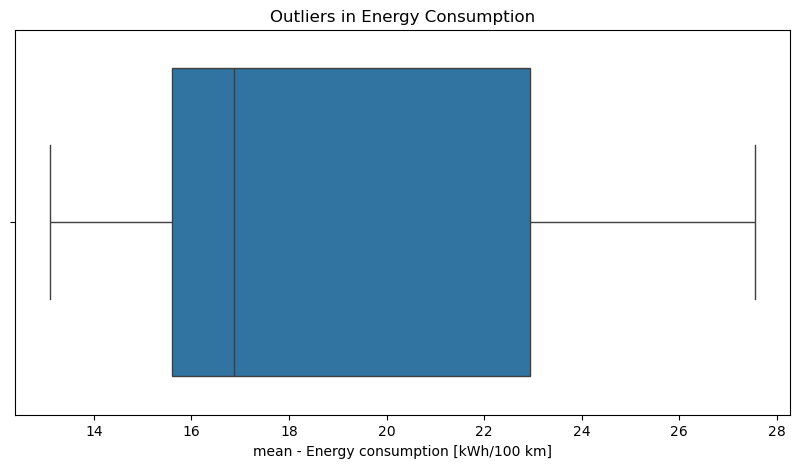

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset['mean - Energy consumption [kWh/100 km]'])
plt.title("Outliers in Energy Consumption")
plt.show()


Correlation between Battery Capacity and Range: 0.81


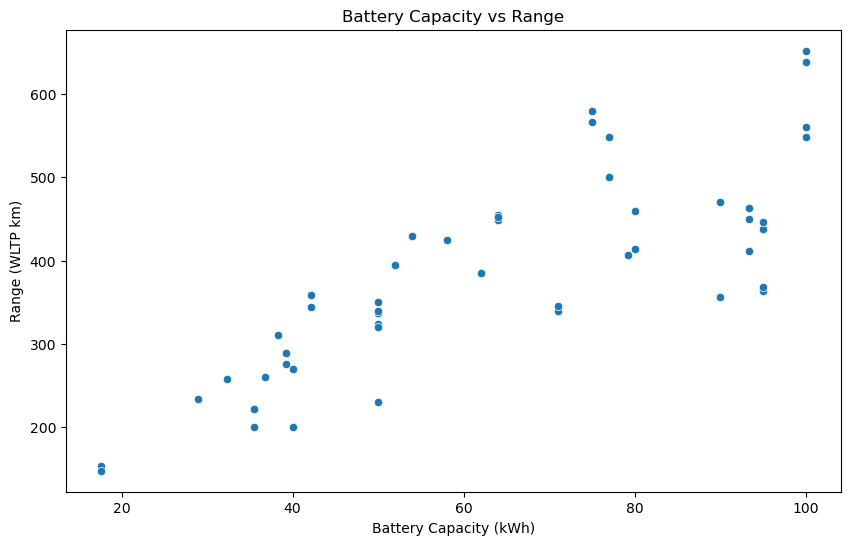

In [21]:
#Task 3.
def analyze_battery_range_relationship(df: pd.DataFrame):
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]')
    plt.title('Battery Capacity vs Range')
    plt.xlabel('Battery Capacity (kWh)')
    plt.ylabel('Range (WLTP km)')
    
    # Calculate correlation coefficient
    correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
    return correlation

# Example usage

if __name__ == "__main__":
    
    # Read the data
    df = pd.read_csv('C:/Users/lap/Downloads/FEV-data-Excel.xlsx - Auta elektryczne.csv')
    
    # Get correlation
    correlation = analyze_battery_range_relationship(df)
    
    # Print result
    print(f"\nCorrelation between Battery Capacity and Range: {correlation:.2f}")
    
    # Show plot
    plt.show()

In [23]:
#Task 4.

class EVRecommender:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def get_recommendations(self, budget: float, desired_range: int, min_battery_capacity: float) -> pd.DataFrame:
        # Create mask for filtering
        mask = (
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= desired_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery_capacity)
        )
        
        # Create a copy of the filtered DataFrame
        filtered_df = self.df[mask].copy()
        
        if filtered_df.empty:
            print("No vehicles found matching your criteria.")
            return pd.DataFrame()
        
        # Calculate scores
        filtered_df.loc[:, 'score'] = (
            (filtered_df['Range (WLTP) [km]'] / desired_range) * 0.4 +
            (budget / filtered_df['Minimal price (gross) [PLN]']) * 0.4 +
            (filtered_df['Battery capacity [kWh]'] / min_battery_capacity) * 0.2
        )
        
        # Get top 3 recommendations
        columns_to_show = [
            'Car full name', 'Make', 'Model', 
            'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 
            'Battery capacity [kWh]', 'score'
        ]
        
        recommendations = filtered_df.nlargest(3, 'score')[columns_to_show]
        return recommendations

def format_price(price):
    """Format price with thousands separator"""
    return f"{price:,.0f}"

# Example usage
if __name__ == "__main__":
    try:
        # Read the data
        df = pd.read_csv('C:/Users/lap/Downloads/FEV-data-Excel.xlsx - Auta elektryczne.csv')
        
        # Create recommender instance
        recommender = EVRecommender(df)
        
        # Get recommendations
        recommendations = recommender.get_recommendations(
            budget=350000,
            desired_range=400,
            min_battery_capacity=60
        )
        
        if not recommendations.empty:
            print("\nTop 3 Recommended Electric Vehicles:")
            print("-" * 50)
            for idx, row in recommendations.iterrows():
                print(f"\nRecommendation {recommendations.index.get_loc(idx) + 1}:")
                print(f"Model: {row['Car full name']}")
                print(f"Make: {row['Make']}")
                print(f"Price: {format_price(row['Minimal price (gross) [PLN]'])} PLN")
                print(f"Range: {row['Range (WLTP) [km]']} km")
                print(f"Battery: {row['Battery capacity [kWh]']} kWh")
                print(f"Match Score: {row['score']:.2f}")
                
    except FileNotFoundError:
        print("Error: CSV file not found. Make sure 'FEV-data-Excel.xlsx - Auta elektryczne.csv' is in the current directory.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


Top 3 Recommended Electric Vehicles:
--------------------------------------------------

Recommendation 1:
Model: Volkswagen ID.3 Pro S
Make: Volkswagen
Price: 179,990 PLN
Range: 549 km
Battery: 77.0 kWh
Match Score: 1.58

Recommendation 2:
Model: Kia e-Soul 64kWh
Make: Kia
Price: 160,990 PLN
Range: 452 km
Battery: 64.0 kWh
Match Score: 1.53

Recommendation 3:
Model: Kia e-Niro 64kWh
Make: Kia
Price: 167,990 PLN
Range: 455 km
Battery: 64.0 kWh
Match Score: 1.50


In [29]:
#Tsk 5.
from scipy.stats import ttest_ind, shapiro, levene

# Extract Tesla and Audi engine power data
tesla_power = df[df["Make"] == "Tesla"]["Engine power [KM]"].dropna()
audi_power = df[df["Make"] == "Audi"]["Engine power [KM]"].dropna()

# Check normality assumption using Shapiro-Wilk test
shapiro_tesla = shapiro(tesla_power)
shapiro_audi = shapiro(audi_power)

# Check homogeneity of variances using Levene’s test
levene_test = levene(tesla_power, audi_power)

# Perform independent t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=True)  
# Interpret the results
alpha = 0.05  
# Significance level

if p_value < alpha:
    print("There is a significant difference in the average engine power between Tesla and Audi vehicles.")
else:
    print("There is no significant difference in the average engine power between Tesla and Audi vehicles.")

# Display results
{
    "Tesla Mean Power": round(tesla_power.mean(), 2),
    "Audi Mean Power": round(audi_power.mean(), 2),
    "Shapiro-Wilk Tesla p-value": round(shapiro_tesla.pvalue, 4),
    "Shapiro-Wilk Audi p-value": round(shapiro_audi.pvalue, 4),
    "Levene Test p-value": round(levene_test.pvalue, 4),
    "T-test Statistic": round(t_stat, 4),
    "P-value": round(p_value, 4)
}

There is no significant difference in the average engine power between Tesla and Audi vehicles.


{'Tesla Mean Power': 533.0,
 'Audi Mean Power': 392.0,
 'Shapiro-Wilk Tesla p-value': 0.3819,
 'Shapiro-Wilk Audi p-value': 0.0441,
 'Levene Test p-value': 0.2196,
 'T-test Statistic': 1.7024,
 'P-value': 0.1167}